# データの可視化

## 表の装飾

### pandasでformat

[Table Visualization — pandas 2.2.3 documentation](https://pandas.pydata.org/docs/user_guide/style.html)

In [71]:
import pandas as pd
import numpy as np

# サンプルデータ
np.random.seed(0)
df = pd.DataFrame({"A": np.random.poisson(lam=10, size=5), "B": np.random.randn(5)})

#### 小数点の丸め込み

In [72]:
df.style.format(precision=3, thousands=",", decimal=".")

,A,B
0,10,0.144
1,11,1.454
2,9,0.761
3,9,0.122
4,18,0.444


In [73]:
# 列ごとに指定したい場合
df.style.format({"A": "{:.1f}", "B": "{:.1%}"})

,A,B
0,10.0,14.4%
1,11.0,145.4%
2,9.0,76.1%
3,9.0,12.2%
4,18.0,44.4%


style.formatは追加のパッケージが必要になる

pandasのみで使えるのは .apply() と 標準の文字整形メソッド `str.format` を使うもの

In [74]:
df["B"].apply("{:.1%}".format)

0     14.4%
1    145.4%
2     76.1%
3     12.2%
4     44.4%
Name: B, dtype: object

In [75]:
# dictに指定しなかった列は含まれないので注意
df.apply({"A": "{:.1f}".format, "B": "{:.1%}".format})

,A,B
0,10.0,14.4%
1,11.0,145.4%
2,9.0,76.1%
3,9.0,12.2%
4,18.0,44.4%


#### 値の大きさに応じた色を塗る

In [70]:
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)

df.style.background_gradient(cmap=cm)

#### 棒グラフを作る

In [60]:
df.style.bar(subset=["A", "B"], color='#d65f5f')

,A,B
0,10,0.144044
1,11,1.454274
2,9,0.761038
3,9,0.121675
4,18,0.443863


### great_tablesパッケージできれいな表を作る

[Examples – great_tables](https://posit-dev.github.io/great-tables/examples/)

論文のような簡潔な表や、アイコンや色を使ったカジュアルな表などいろいろ作れる

In [42]:
from great_tables import GT, html
from great_tables.data import airquality

airquality_m = airquality.head(5).assign(Year=1973)

gt_airquality = (
    GT(airquality_m)
    .tab_header(
        title="New York Air Quality Measurements",
        subtitle="Daily measurements in New York City (May 1-10, 1973)",
    )
    .tab_spanner(label="Time", columns=["Year", "Month", "Day"])
    .tab_spanner(label="Measurement", columns=["Ozone", "Solar_R", "Wind", "Temp"])
    .cols_move_to_start(columns=["Year", "Month", "Day"])
    .cols_label(
        Ozone=html("Ozone,<br>ppbV"),
        Solar_R=html("Solar R.,<br>cal/m<sup>2</sup>"),
        Wind=html("Wind,<br>mph"),
        Temp=html("Temp,<br>&deg;F"),
    )
)

gt_airquality

GT(_tbl_data=   Ozone  Solar_R  Wind  Temp  Month  Day  Year
0   41.0    190.0   7.4    67      5    1  1973
1   36.0    118.0   8.0    72      5    2  1973
2   12.0    149.0  12.6    74      5    3  1973
3   18.0    313.0  11.5    62      5    4  1973
4    NaN      NaN  14.3    56      5    5  1973, _body=<great_tables._gt_data.Body object at 0x7f619ef0ded0>, _boxhead=Boxhead([ColInfo(var='Year', type=<ColInfoTypeEnum.default: 1>, column_label='Year', column_align='right', column_width=None), ColInfo(var='Month', type=<ColInfoTypeEnum.default: 1>, column_label='Month', column_align='right', column_width=None), ColInfo(var='Day', type=<ColInfoTypeEnum.default: 1>, column_label='Day', column_align='right', column_width=None), ColInfo(var='Ozone', type=<ColInfoTypeEnum.default: 1>, column_label=Html(text='Ozone,<br>ppbV'), column_align='right', column_width=None), ColInfo(var='Solar_R', type=<ColInfoTypeEnum.default: 1>, column_label=Html(text='Solar R.,<br>cal/m<sup>2</sup>'), column_align='right', column_width=None), ColInfo(var='Wind', type=<ColInfoTypeEnum.default: 1>, column_label=Html(text='Wind,<br>mph'), column_align='right', column_width=None), ColInfo(var='Temp', type=<ColInfoTypeEnum.default: 1>, column_label=Html(text='Temp,<br>&deg;F'), column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7f61d5e5f7f0>, _spanners=Spanners([SpannerInfo(spanner_id='Time', spanner_level=0, spanner_label='Time', spanner_units=None, spanner_pattern=None, vars=['Year', 'Month', 'Day'], built=None), SpannerInfo(spanner_id='Measurement', spanner_level=0, spanner_label='Measurement', spanner_units=None, spanner_pattern=None, vars=['Ozone', 'Solar_R', 'Wind', 'Temp'], built=None)]), _heading=Heading(title='New York Air Quality Measurements', subtitle='Daily measurements in New York City (May 1-10, 1973)', preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x7f61d5635330>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_rig

## 作図

### `autofmt_xdate()`：日付ラベルを整える

日付ラベルが重なりそうなら傾きをつけてくれる

[matplotlib.figure.Figure.autofmt_xdate — Matplotlib 3.9.2 documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.autofmt_xdate.html)

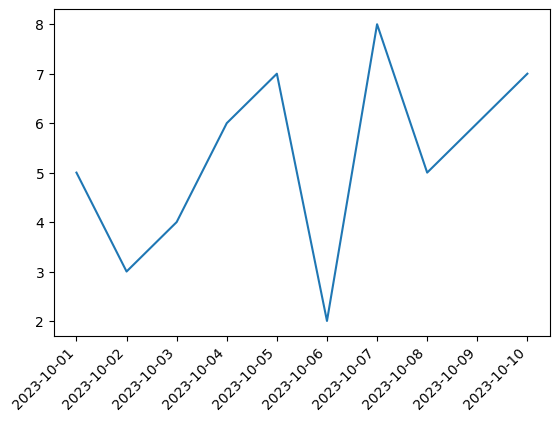

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

dates = pd.date_range('2023-10-01', periods=10, freq='D')
values = [5, 3, 4, 6, 7, 2, 8, 5, 6, 7]

fig, ax = plt.subplots()
ax.plot(dates, values)
fig.autofmt_xdate(rotation=45, ha='right')
plt.show()